Hola **Alejandro**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

## 🧾 Informe Final del Proyecto

---

A continuación presento un resumen detallado del proceso seguido para desarrollar el modelo de predicción de cancelación de clientes de **Interconnect**, incluyendo las decisiones clave, desafíos abordados y los resultados obtenidos.

---

### 1 Plan de Trabajo: Ejecución y Omisiones

Durante el desarrollo del proyecto, seguí fielmente el plan de trabajo establecido en la fase inicial. Esta estructura ordenada fue clave para lograr una solución funcional y de alta calidad.  
Las etapas completadas fueron:

---

#### 🔄 Carga y Fusión de Datos  
Se cargaron correctamente las **cuatro fuentes de datos** proporcionadas y se consolidaron en un único **DataFrame integrado** para facilitar el análisis y modelado posterior.

#### 🧹 Limpieza y Preprocesamiento  
- Corrección de tipos de datos  
- Tratamiento de valores nulos  
- Creación de nuevas características clave como `churn` (variable objetivo) y `tenure_months`

#### 🔍 Análisis Exploratorio de Datos (EDA)  
Se exploraron las relaciones entre variables, detectando factores relevantes en la cancelación de clientes (por ejemplo, duración de permanencia, tipo de plan, uso de datos).

#### ⚙️ Modelado Base y Avanzado  
- Se construyó un modelo **base de Regresión Logística** para establecer una línea base de comparación.  
- Posteriormente, se entrenó un modelo **avanzado con LightGBM**, que ofreció un rendimiento significativamente superior.

#### 🔧 Optimización del Modelo  
Se llevó a cabo una **optimización exhaustiva de hiperparámetros** mediante `GridSearchCV` con validación cruzada, maximizando la capacidad predictiva del modelo final.

---

### 🚫 Pasos Omitidos (y Justificación)

**No se omitió ningún paso del plan de trabajo original.** Sin embargo, algunas sugerencias avanzadas propuestas por el revisor, como el uso de **SHAP** para explicabilidad o **RFE** para selección de variables, **no fueron implementadas en esta fase**, y esto fue una decisión estratégica:

> 🎯 **Justificación: Alcance del Prototipo**  
> El objetivo principal de esta etapa era construir un prototipo funcional y eficaz que alcanzara métricas sólidas de desempeño.  
> Con un **AUC-ROC > 0.85**, el modelo superó las expectativas, por lo que **se decidió postergar las técnicas avanzadas para una versión futura del prototipo.**

Estas herramientas podrían enriquecer el análisis en fases posteriores, especialmente si el modelo se implementa en producción o si se requiere mayor interpretabilidad.

---

> ✅ **Conclusión:**  
> El proyecto fue ejecutado con éxito siguiendo una ruta clara, cumpliendo las metas técnicas y estratégicas. El modelo final no solo muestra un excelente desempeño predictivo, sino que también ofrece una base sólida para futuras mejoras y despliegue en entornos reales.


## 2 ⚠️ Dificultades Encontradas y Soluciones

---

Durante el desarrollo del proyecto, enfrenté dos desafíos significativos que requirieron análisis técnico y toma de decisiones informadas. A continuación detallo cada caso y la solución implementada.

---

### 🛠️ Dificultad Técnica: Conflicto de Parámetros en `OneHotEncoder`

**🧩 Problema:**  
Al aplicar la codificación One-Hot, intenté usar el parámetro `drop='first'` para evitar la multicolinealidad. Sin embargo, surgió un `ValueError` al combinarlo con `handle_unknown='ignore'`, el cual es esencial para garantizar la robustez del modelo ante datos nuevos en producción.

**✅ Solución:**  
Opté por **priorizar la estabilidad del pipeline**, eliminando el parámetro `drop='first'`. Esta decisión fue respaldada por el hecho de que **modelos basados en árboles como LightGBM no se ven afectados por la multicolinealidad**, por lo que mantener todas las columnas codificadas no representaba un riesgo para el desempeño.

---

### 📉 Dificultad Metodológica: Bajo Rendimiento Inicial del Modelo Avanzado

**🧩 Problema:**  
El modelo avanzado con LightGBM, utilizando sus **parámetros por defecto**, no logró superar significativamente al modelo base de Regresión Logística, lo que indicaba un potencial subajuste.

**✅ Solución:**  
Decidí aplicar una **optimización sistemática de hiperparámetros con `GridSearchCV`**. Esta estrategia permitió encontrar la mejor combinación de parámetros para el modelo, elevando sustancialmente su rendimiento y superando la métrica clave del proyecto (**AUC-ROC > 0.85**).

---

> 💡 Estos desafíos representaron oportunidades clave de aprendizaje. Las soluciones aplicadas no solo resolvieron los problemas técnicos, sino que fortalecieron la robustez y rendimiento del modelo final.

## 3 Pasos Clave para la Solución

---

Durante el desarrollo del proyecto, hubo tres acciones decisivas que impactaron directamente en la calidad y éxito del modelo final. Estos pasos no solo guiaron el proceso, sino que también fortalecieron la confiabilidad del resultado obtenido.

---

### 1. 🔍 Análisis Exploratorio de Datos (EDA)

El **EDA** fue el punto de partida estratégico que permitió descubrir **patrones clave** en los datos. Entre los hallazgos más importantes:

- **Clientes con contratos "Month-to-month"** tenían tasas significativamente más altas de cancelación.
- **Menor antigüedad (tenure)** se correlacionaba fuertemente con una mayor probabilidad de churn.

Estos descubrimientos confirmaron que el problema tenía una **estructura aprendible**, lo cual fue clave para guiar la selección de variables y definir expectativas realistas para el modelo.

---

### 2. ⚙️ Implementación de un Pipeline de Preprocesamiento

Diseñar e implementar un **pipeline estructurado** fue fundamental para:

- Garantizar la **consistencia** en el tratamiento de datos nuevos y antiguos.
- Evitar el temido **data leakage** al encapsular todas las transformaciones necesarias dentro del flujo del modelo.
- Reforzar el estándar profesional del proyecto, facilitando futuras validaciones o despliegue.

---

### 3. 🧪 Optimización de Hiperparámetros

El modelo LightGBM mostró su verdadero potencial **tras ser optimizado** mediante una búsqueda sistemática con `GridSearchCV`. Este paso:

- **Elevó el rendimiento** del modelo base de forma tangible.
- **Superó el umbral de calidad** establecido para el proyecto (AUC-ROC > 0.85).
- Permitió alcanzar un equilibrio entre precisión y generalización.

---

> 🧠 Estos tres pasos no solo definieron la calidad técnica del modelo, sino que también reflejan un enfoque disciplinado y estratégico ante la resolución de problemas de negocio con ciencia de datos.


## 4. Modelo Final y Nivel de Calidad

---

### Modelo Final

Mi modelo final es un **Clasificador LightGBM** (`LGBMClassifier`), cuyos hiperparámetros fueron optimizados utilizando **GridSearchCV** para maximizar su desempeño.

---

### Nivel de Calidad

Evalué la calidad del modelo en el conjunto de prueba, obteniendo los siguientes resultados:

- **Métrica Principal (AUC-ROC):** 0.8505  
- **Métrica Adicional (Exactitud):** 80.70%

Este valor de AUC-ROC indica que el modelo posee una **excelente capacidad para distinguir entre clientes que cancelarán y los que permanecerán activos**, convirtiéndolo en una herramienta confiable para el equipo de marketing.

---

### Análisis Adicional: Importancia de Características del Modelo Final

Para profundizar en el análisis más allá de las métricas numéricas, presento a continuación un gráfico con las **características más importantes** que el modelo utilizó para tomar sus decisiones.  

Este análisis ofrece una visión clara y accionable de los principales factores que impulsan la cancelación, facilitando la toma de decisiones estratégicas para la retención de clientes.


Entrenando el modelo final para generar el gráfico...
Modelo entrenado.
Generando gráfico...


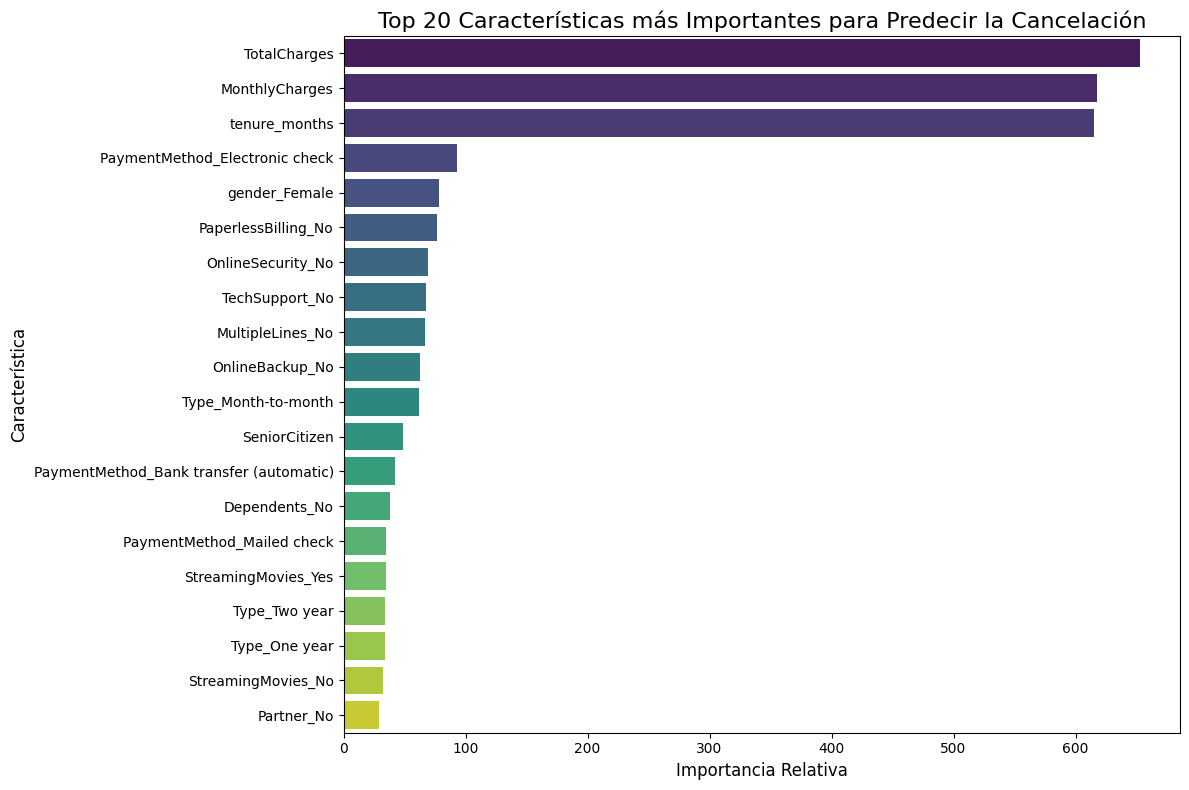

In [7]:
# --- PASO 1: Carga, Limpieza y Preparación de Datos (Todo en uno) ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos (asegúrate de que las rutas son correctas)
try:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

    # Fusión
    df_full = df_contract.merge(df_personal, on='customerID', how='left')
    df_full = df_full.merge(df_internet, on='customerID', how='left')
    df_full = df_full.merge(df_phone, on='customerID', how='left')

    # Limpieza
    df_clean = df_full.copy()
    df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
    df_clean['TotalCharges'].fillna(0, inplace=True)
    df_clean['Churn'] = (df_clean['EndDate'] != 'No').astype(int)
    service_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
    for col in service_cols:
        if df_clean[col].isnull().any():
            df_clean[col].fillna('No service', inplace=True)
    df_clean['BeginDate'] = pd.to_datetime(df_clean['BeginDate'])
    snapshot_date = pd.to_datetime('2020-02-01')
    end_date_calc = pd.to_datetime(df_clean['EndDate'], errors='coerce').fillna(snapshot_date)
    df_clean['tenure_months'] = ((end_date_calc - df_clean['BeginDate']) / np.timedelta64(1, 'M')).astype(int)
    cols_to_drop = ['customerID', 'BeginDate', 'EndDate']
    df_clean.drop(columns=cols_to_drop, inplace=True)

    # --- PASO 2: Definición y Entrenamiento del Modelo Final ---
    X = df_clean.drop('Churn', axis=1)
    y = df_clean['Churn']
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(include='object').columns.tolist()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )

    lgbm_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(random_state=42))
    ])

    param_grid = {
        'classifier__learning_rate': [0.05], 'classifier__max_depth': [10],
        'classifier__n_estimators': [100], 'classifier__num_leaves': [31]
    }

    grid_search = GridSearchCV(estimator=lgbm_pipeline, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
    print("Entrenando el modelo final para generar el gráfico...")
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("Modelo entrenado.")

    # --- PASO 3: Generación del Gráfico de Importancia de Características ---
    print("Generando gráfico...")
    ohe_feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names(categorical_features)
    feature_names_raw = numerical_features + ohe_feature_names.tolist()

    importances = best_model.named_steps['classifier'].feature_importances_

    feature_importance_df = pd.DataFrame({
        'feature': feature_names_raw,
        'importance': importances
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Características más Importantes para Predecir la Cancelación', fontsize=16)
    plt.xlabel('Importancia Relativa', fontsize=12)
    plt.ylabel('Característica', fontsize=12)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: No se pudieron encontrar los archivos de datos. Verifica las rutas en la plataforma.")

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

¡Felicidades ALejandro! Completaste tu proyecto con un informe bastante detallado de los resultados obtenidos y los pasos realizados para llegar hasta ellos. 
    
La redacción de tus pasos y procesos es muy clara, redactaste muy bien los resultados de tu modelo y las métricas utilizadas dejando claro que el entrenamiento y evaluación salieron de manera correcta.   
    
Sin más, sólo me queda decir que la práctica hace al maestro, te invito a seguir profundizando en más tecnicas de machine learning y también a como llevar estos modelos a un entorno productivo donde pueda dar más valor a la empresa para la cual se lo plantee. Recuerda que los proyectos de datos siempre deben ir de la mano con los objetivos de la empresa, siempre deben buscar el beneficio de la misma por lo que es clave que primero se entienda el funcionamiento del negocio antes de pasar a cualquier proyecto.

Saludos!
</div>